In [31]:
!pip install spacy

!pip install --upgrade spacy


In [32]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 11.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
# Importar librerías
import pandas as pd
import requests

# URL del archivo CSV
url = 'https://raw.githubusercontent.com/karen-pal/borges/f2b34af9a523cfe339ed27e20fa02bf81c0ea5e2/datasets/datasets_csv/benedetti_full_texts.csv'

# Descargar el archivo CSV
response = requests.get(url)

# Guardar el archivo en el entorno de Colab
with open('benedetti_full_texts.csv', 'wb') as file:
    file.write(response.content)

# Leer el archivo CSV con pandas
df = pd.read_csv('benedetti_full_texts.csv')

# Mostrar las primeras filas del dataset para asegurarnos de que se cargó correctamente
df.head(6)


,link,text_metadata,text
0,https://ciudadseva.com/texto/a-imagen-y-semeja...,"{'title': 'A imagen y semejanza', 'metadata': ...","Era la última hormiga de la caravana, y no pud..."
1,https://ciudadseva.com/texto/almuerzo-y-dudas/,"{'title': 'Almuerzo y dudas', 'metadata': '[Cu...","El hombre se detuvo frente a la vidriera, pero..."
2,https://ciudadseva.com/texto/andamios/,"{'title': 'Andamios', 'metadata': '[Cuento - T...",“…Javier se había aprontado para almorzar a so...
3,https://ciudadseva.com/texto/beatriz-la-polucion/,"{'title': 'Beatriz, la polución', 'metadata': ...",Dijo el tío Rolando que esta ciudad se está po...
4,https://ciudadseva.com/texto/beatriz-una-palab...,"{'title': 'Beatriz, una palabra enorme', 'meta...","Libertad es una palabra enorme. Por ejemplo, c..."
5,https://ciudadseva.com/texto/bestiario-benedetti/,"{'title': 'Bestiario', 'metadata': '[Minicuent...",La asamblea anual de la Fauna Artística y Lite...


In [27]:
df.columns

Index(['link', 'text_metadata', 'text'], dtype='object')

In [28]:
# Seleccionar el cuento de la fila que deseo ("los pocillos: fila 20")
cuento = df.iloc[20]  #fila 20
# Obtener el texto del cuento (accedemos al valor de la columna 'text' directamente)
texto_cuento = cuento['text']
texto_cuento

'Los pocillos eran seis: dos rojos, dos negros, dos verdes, y además importados, irrompibles, modernos. Habían llegado como regalo de Enriqueta, en el último cumpleaños de Mariana, y desde ese día el comentario de cajón había sido que podía combinarse la taza de un color con el platillo de otro. “Negro con rojo queda fenomenal”, había sido el consejo estético de Enriqueta. Pero Mariana, en un discreto rasgo de independencia, había decidido que cada pocillo sería usado con su plato del mismo color. “El café ya está pronto. ¿Lo sirvo?”, preguntó Mariana. La voz se dirigía al marido, pero los ojos estaban fijos en el cuñado. Este parpadeó y no dijo nada, pero José Claudio contestó: “Todavía no. Esperá un ratito. Antes quiero fumar un cigarrillo”. Ahora sí ella miró a José Claudio y pensó, por milésima vez, que aquellos ojos no parecían de ciego. La mano de José Claudio empezó a moverse, tanteando el sofá. “¿Qué buscás?” preguntó ella. “El encendedor”. “A tu derecha”. La mano corrigió el r

In [29]:
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [33]:
# Cargar el modelo en español

nlp = spacy.load("es_core_news_md")


In [34]:


# Seleccionar el cuento de la fila que deseas (en este caso, fila 20)
cuento = df.iloc[20]  # Fila 20

# Obtener el texto del cuento
texto_cuento = cuento['text']

# Procesar el texto con spaCy
doc = nlp(texto_cuento)
doc


Los pocillos eran seis: dos rojos, dos negros, dos verdes, y además importados, irrompibles, modernos. Habían llegado como regalo de Enriqueta, en el último cumpleaños de Mariana, y desde ese día el comentario de cajón había sido que podía combinarse la taza de un color con el platillo de otro. “Negro con rojo queda fenomenal”, había sido el consejo estético de Enriqueta. Pero Mariana, en un discreto rasgo de independencia, había decidido que cada pocillo sería usado con su plato del mismo color. “El café ya está pronto. ¿Lo sirvo?”, preguntó Mariana. La voz se dirigía al marido, pero los ojos estaban fijos en el cuñado. Este parpadeó y no dijo nada, pero José Claudio contestó: “Todavía no. Esperá un ratito. Antes quiero fumar un cigarrillo”. Ahora sí ella miró a José Claudio y pensó, por milésima vez, que aquellos ojos no parecían de ciego. La mano de José Claudio empezó a moverse, tanteando el sofá. “¿Qué buscás?” preguntó ella. “El encendedor”. “A tu derecha”. La mano corrigió el ru

Comenzamos con técnicas de PREPROCESAMIENTO de NLP como:


*   Tokenización: dividimos el texto en Uds menores relevantes, filtrando los stopwords y signos de puntuación que son necesarios para la lógica del texto pero no hacen al análisis
*   Stopwords: justamente esas palabras como "y", "el", "la", "de", etc. cuya remoción no altera el significado/contenido del análisis.
*  Lematización: rudicir la palabra a su raíz, forma base o lematizada (ejemplo: "jugando" se convierte en "jugar")
*   También puede entrar en esta categoría el Stemming (reduciendo a la raíz pero eliminado sufijos, puede llevar a devolver algo no coherente desde el punto de vista gramatical), conversión a minúsculas, eliminanción de signos de puntuación, caracteres no alfabéticos, entre otros.

Estas son todas técnicas que "preparan", "filtran", "limpian", el corpus para poder aplicarle luego sí técnicas de PROCESAMIENTO de NLP como nube de palabras, análisis de sentiemiento, POS tagging, TF-IDF, etc. que serán desarolladas luego, en una segunda instnacia del documento.








In [35]:
#Filtrar las palabras que no son stopwords ni puntuación (tokens relevantes)
tokens_filtrados = [token.text for token in doc if not token.is_stop and not token.is_punct]
tokens_filtrados

['pocillos',
 'rojos',
 'negros',
 'verdes',
 'importados',
 'irrompibles',
 'modernos',
 'llegado',
 'regalo',
 'Enriqueta',
 'cumpleaños',
 'Mariana',
 'comentario',
 'cajón',
 'podía',
 'combinarse',
 'taza',
 'color',
 'platillo',
 'Negro',
 'rojo',
 'queda',
 'fenomenal',
 'consejo',
 'estético',
 'Enriqueta',
 'Mariana',
 'discreto',
 'rasgo',
 'independencia',
 'decidido',
 'pocillo',
 'usado',
 'plato',
 'color',
 'café',
 'sirvo',
 'preguntó',
 'Mariana',
 'voz',
 'dirigía',
 'marido',
 'ojos',
 'fijos',
 'cuñado',
 'parpadeó',
 'José',
 'Claudio',
 'contestó',
 'Esperá',
 'ratito',
 'quiero',
 'fumar',
 'cigarrillo',
 'miró',
 'José',
 'Claudio',
 'pensó',
 'milésima',
 'ojos',
 'parecían',
 'ciego',
 'mano',
 'José',
 'Claudio',
 'empezó',
 'moverse',
 'tanteando',
 'sofá',
 'buscás',
 'preguntó',
 'encendedor',
 'derecha',
 'mano',
 'corrigió',
 'rumbo',
 'halló',
 'encendedor',
 'temblor',
 'continuado',
 'afán',
 'búsqueda',
 'pulgar',
 'girar',
 'ruedita',
 'llama',
 'ap

In [36]:
# Extraer las stopwords que fueron eliminadas
stopwords_filtradas = [token.text for token in doc if token.is_stop]
stopwords_filtradas

['Los',
 'eran',
 'seis',
 'dos',
 'dos',
 'dos',
 'y',
 'además',
 'Habían',
 'como',
 'de',
 'en',
 'el',
 'último',
 'de',
 'y',
 'desde',
 'ese',
 'día',
 'el',
 'de',
 'había',
 'sido',
 'que',
 'la',
 'de',
 'un',
 'con',
 'el',
 'de',
 'otro',
 'con',
 'había',
 'sido',
 'el',
 'de',
 'Pero',
 'en',
 'un',
 'de',
 'había',
 'que',
 'cada',
 'sería',
 'con',
 'su',
 'del',
 'mismo',
 'El',
 'ya',
 'está',
 'pronto',
 'Lo',
 'La',
 'se',
 'al',
 'pero',
 'los',
 'estaban',
 'en',
 'el',
 'Este',
 'y',
 'no',
 'dijo',
 'nada',
 'pero',
 'Todavía',
 'no',
 'un',
 'Antes',
 'un',
 'Ahora',
 'sí',
 'ella',
 'a',
 'y',
 'por',
 'vez',
 'que',
 'aquellos',
 'no',
 'de',
 'La',
 'de',
 'a',
 'el',
 'Qué',
 'ella',
 'El',
 'A',
 'tu',
 'La',
 'el',
 'y',
 'el',
 'Con',
 'ese',
 'que',
 'da',
 'el',
 'de',
 'el',
 'hizo',
 'varias',
 'veces',
 'la',
 'pero',
 'la',
 'no',
 'A',
 'una',
 'ya',
 'la',
 'de',
 'la',
 'del',
 'Entonces',
 'un',
 'y',
 'en',
 'su',
 'Por',
 'qué',
 'no',
 'lo',

In [37]:
# Contar la frecuencia de las stopwords eliminadas
frecuencia_stopwords = Counter(stopwords_filtradas)


In [38]:
# Mostrar las 10 stopwords más frecuentes
print("Las 10 stopwords más frecuentes son:")
for palabra, frecuencia in frecuencia_stopwords.most_common(10):
    print(f"{palabra}: {frecuencia}")

# Mostrar las stopwords que fueron eliminadas (opcional)
print("\nStopwords eliminadas:")
print(stopwords_filtradas[:30])  # Mostrar las primeras 30 stopwords eliminadas

Las 10 stopwords más frecuentes son:
de: 88
que: 59
la: 57
y: 45
el: 45
a: 44
había: 38
en: 36
se: 34
un: 29

Stopwords eliminadas:
['Los', 'eran', 'seis', 'dos', 'dos', 'dos', 'y', 'además', 'Habían', 'como', 'de', 'en', 'el', 'último', 'de', 'y', 'desde', 'ese', 'día', 'el', 'de', 'había', 'sido', 'que', 'la', 'de', 'un', 'con', 'el', 'de']


In [39]:
from collections import Counter

In [40]:
#Lematización
# Aplicar lematización sin stopwords ni puntuación
lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Mostrar el resultado
print("Texto original: ", doc)
print("Texto lematizado: ", " ".join(lemas))

Texto original:  Los pocillos eran seis: dos rojos, dos negros, dos verdes, y además importados, irrompibles, modernos. Habían llegado como regalo de Enriqueta, en el último cumpleaños de Mariana, y desde ese día el comentario de cajón había sido que podía combinarse la taza de un color con el platillo de otro. “Negro con rojo queda fenomenal”, había sido el consejo estético de Enriqueta. Pero Mariana, en un discreto rasgo de independencia, había decidido que cada pocillo sería usado con su plato del mismo color. “El café ya está pronto. ¿Lo sirvo?”, preguntó Mariana. La voz se dirigía al marido, pero los ojos estaban fijos en el cuñado. Este parpadeó y no dijo nada, pero José Claudio contestó: “Todavía no. Esperá un ratito. Antes quiero fumar un cigarrillo”. Ahora sí ella miró a José Claudio y pensó, por milésima vez, que aquellos ojos no parecían de ciego. La mano de José Claudio empezó a moverse, tanteando el sofá. “¿Qué buscás?” preguntó ella. “El encendedor”. “A tu derecha”. La ma

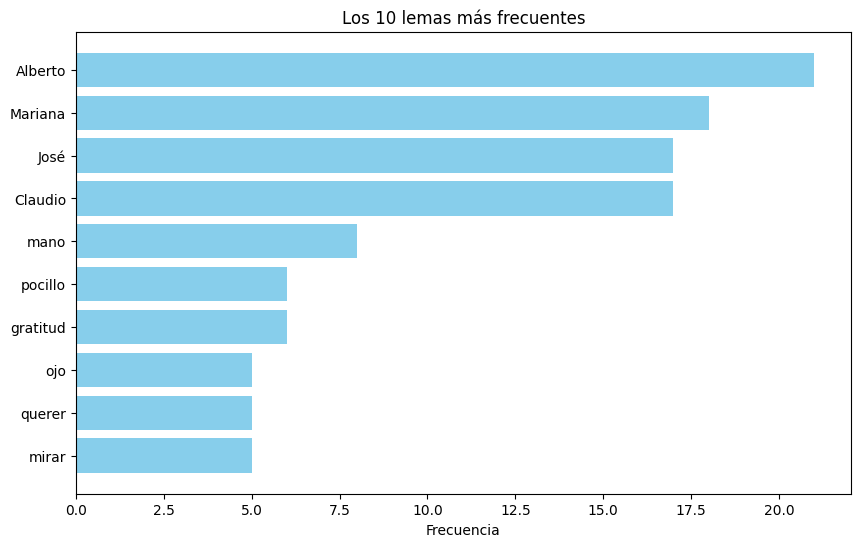

In [41]:
# Contar las frecuencias de los lemas
frecuencia_lemas = Counter(lemas)

# Seleccionar los 10 lemas más frecuentes
lemas_mas_frecuentes = frecuencia_lemas.most_common(10)

# Separar los lemas y sus frecuencias para graficarlos
lemas, frecuencias = zip(*lemas_mas_frecuentes)

# Graficar los 10 lemas más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(lemas, frecuencias, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Los 10 lemas más frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el lema más frecuente esté arriba
plt.show()

los lemas más frecuentes son, como era de esperar, los nombres propios de los personajes principales (la pareja José Claudio y Mariana + Alberto, hermano del primero que se enamora de Mariana). Si tendrá preponderancia Alberto y la trama del engaño, que es el lema más nombrado. Lógico con lo que el autor intenta motivar y la reacción que busca en el lector con su cuento.

In [42]:
# finalmente, otras técnicas de prep. como el lower texto en minúsculas y sin signos de puntuación.
texto_sin_puntuacion_en_min = [token.text.lower() for token in doc if not token.is_punct]
texto_sin_puntuacion_en_min


['los',
 'pocillos',
 'eran',
 'seis',
 'dos',
 'rojos',
 'dos',
 'negros',
 'dos',
 'verdes',
 'y',
 'además',
 'importados',
 'irrompibles',
 'modernos',
 'habían',
 'llegado',
 'como',
 'regalo',
 'de',
 'enriqueta',
 'en',
 'el',
 'último',
 'cumpleaños',
 'de',
 'mariana',
 'y',
 'desde',
 'ese',
 'día',
 'el',
 'comentario',
 'de',
 'cajón',
 'había',
 'sido',
 'que',
 'podía',
 'combinarse',
 'la',
 'taza',
 'de',
 'un',
 'color',
 'con',
 'el',
 'platillo',
 'de',
 'otro',
 'negro',
 'con',
 'rojo',
 'queda',
 'fenomenal',
 'había',
 'sido',
 'el',
 'consejo',
 'estético',
 'de',
 'enriqueta',
 'pero',
 'mariana',
 'en',
 'un',
 'discreto',
 'rasgo',
 'de',
 'independencia',
 'había',
 'decidido',
 'que',
 'cada',
 'pocillo',
 'sería',
 'usado',
 'con',
 'su',
 'plato',
 'del',
 'mismo',
 'color',
 'el',
 'café',
 'ya',
 'está',
 'pronto',
 'lo',
 'sirvo',
 'preguntó',
 'mariana',
 'la',
 'voz',
 'se',
 'dirigía',
 'al',
 'marido',
 'pero',
 'los',
 'ojos',
 'estaban',
 'fijos'

Y así podríamos seguir probando/utilizando técnicas de prepocesamiento, que son las que justamente dejan "limpio", pronto, al corpus, para poder aplicarle técnicas de procesamiento de NLP.
Por ejemplo, nube de palabras que se basa justamente en los tokens_filtrados (sin stopwords y sin puntuación para no desvirtuar el gráfico).

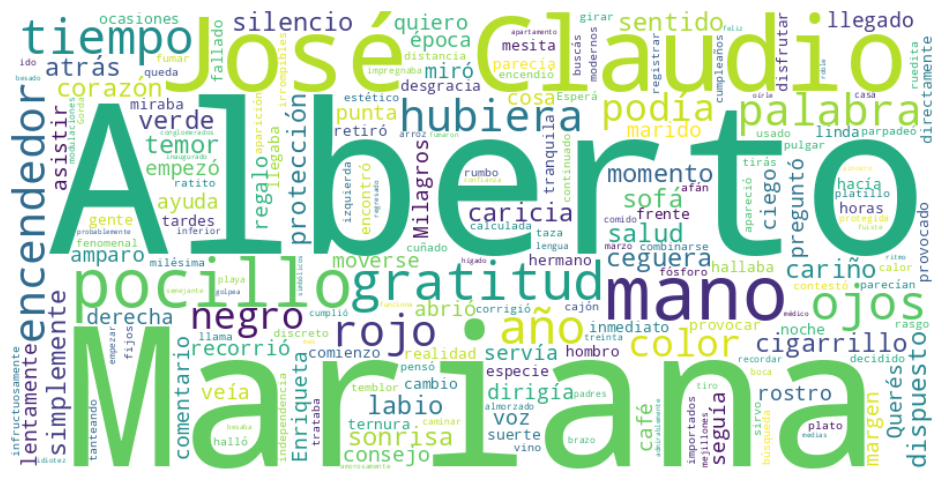

In [43]:
# Generar la nube de palabras a partir de los tokens filtrados
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_filtrados))

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()
#nuevamente vemos los nombres de los personajes en el centro y de mayor tamaño resaltando. También aparece el nombre del libro lematizado y palabras que sugieren amor y engaño. como labios, ojos, corazón, sentido, gratitud, sofá, etc.

In [44]:
# Ahora probaremos con TF-IDF(erm Frequency-Inverse Document Frequency), identificando la frecuencia/importancia de una palabra dentro de un texto
# Para ello, debemos imporatar librería sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Convertir el texto en una lista de documentos
documento = [' '.join(tokens_filtrados)]

# Calcular la matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(documento)

# Obtener las palabras correspondientes al TF-IDF
palabras = vectorizer.get_feature_names_out()

# Obtener los valores de TF-IDF para cada palabra
valores_tfidf = tfidf_matrix.toarray()

# Mostrar las 10 palabras más relevantes con su valor TF-IDF
import pandas as pd
df_tfidf = pd.DataFrame(valores_tfidf, columns=palabras)
df_tfidf = df_tfidf.T.sort_values(by=0, ascending=False)
print(df_tfidf.head(10))
#arribamos a la misma conclusión que con la nube de puntos. El que tiene mayor tfidf es el personaje Alberto pereo moderado. Tampoco es una rareza la palabra, en su combinación con el texto. Podría estar cercana a 1 e incluso superarlo.


                   0
alberto     0.424524
mariana     0.363878
josé        0.343662
claudio     0.343662
mano        0.141508
gratitud    0.121293
ojos        0.101077
tiempo      0.080862
encendedor  0.080862
hubiera     0.080862


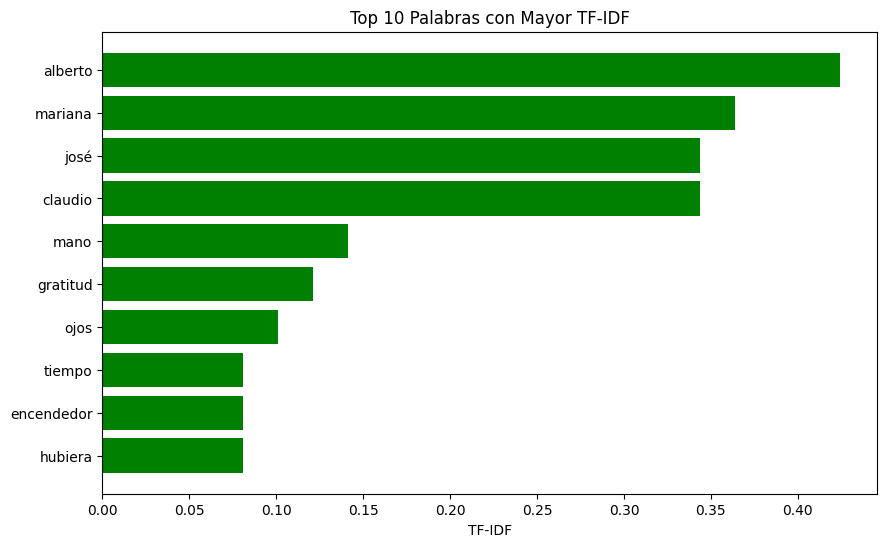

        Palabra    TF-IDF
26      alberto  0.424524
348     mariana  0.363878
322        josé  0.343662
94      claudio  0.343662
341        mano  0.141508
261    gratitud  0.121293
402        ojos  0.101077
554      tiempo  0.080862
193  encendedor  0.080862
281     hubiera  0.080862


In [45]:
# Graficar el top 10 de TF-IDF
# Obtener las palabras correspondientes al TF-IDF
palabras = vectorizer.get_feature_names_out()

# Obtener los valores de TF-IDF para cada palabra
valores_tfidf = tfidf_matrix.toarray().flatten()  # Aplanamos la matriz a un array 1D

# Crear un DataFrame para combinar palabras y sus valores TF-IDF
df_tfidf = pd.DataFrame(list(zip(palabras, valores_tfidf)), columns=['Palabra', 'TF-IDF'])

# Ordenar el DataFrame de mayor a menor valor de TF-IDF
df_tfidf = df_tfidf.sort_values(by='TF-IDF', ascending=False)

# Obtener las 10 palabras con mayor TF-IDF
top_10_tfidf = df_tfidf.head(10)

# Graficar las 10 palabras más relevantes
plt.figure(figsize=(10, 6))
plt.barh(top_10_tfidf['Palabra'], top_10_tfidf['TF-IDF'], color='green')
plt.xlabel('TF-IDF')
plt.title('Top 10 Palabras con Mayor TF-IDF')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la palabra más relevante esté en la parte superior
plt.show()

# Mostrar las 10 palabras más relevantes y sus valores de TF-IDF
print(top_10_tfidf)


Realizaremos un análisis de sentimiento del texto con Spacy en combinación con Textblob, ya que Spacy por sí solo no incluye un analizador de sentimientos.
Claramente la expectativa es que devuelva un sentimiento negativo, pues así el lector lo presiente al consumirlo. No inspira alegría, esperanza, positivismo el texto, todo lo contario, oscuirdad, engaño, bajón

In [46]:
from textblob import TextBlob
# Crear un objeto TextBlob para análisis de sentimiento
blob = TextBlob(texto_cuento)

# Realizar el análisis de sentimiento
sentimiento = blob.sentiment

# Mostrar el resultado
print(f"Sentimiento de TextBlob: {sentimiento}") # ok, da negativo moderado y muy subjetivo, lo cual aplica.

Sentimiento de TextBlob: Sentiment(polarity=-0.5, subjectivity=0.76)


In [47]:
#ahora lo haremos con modelo VADER

!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear un analizador de sentimientos de VADER
analyzer = SentimentIntensityAnalyzer()
# Analizar sentimiento del texto completo
sentimiento = analyzer.polarity_scores(texto_cuento)

# Mostrar el resultado
print(sentimiento)
#el compuesto es muy negativo por lo cual estamos ante la presencia de un texto que transimite tono pesmiista, desagradable o triste. OK, coherente con las conclusiones a las que venimos arribando (y de hecho ya experimentamos como lectores)

{'neg': 0.043, 'neu': 0.952, 'pos': 0.005, 'compound': -0.9967}


Para concluir, intetaremos definir una red neuronal sencilla de una capa, clasificada dentro de NLP (de multicapas ya sería Deep Learning)

In [77]:



import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Crear el modelo secuencial
model = Sequential()

# Capa de entrada (una capa densa) - Este modelo tendrá una capa de salida con una sola neurona
model.add(Dense(units=1, input_dim=300, activation='sigmoid'))


In [50]:
# ahora tenemos que vectorizar el texto para poder entrenar el modelo. Lo hacemos con spacy.
# Convertir los textos en vectores utilizando spaCy
X = [nlp(doc).vector for doc in texto_cuento]

In [51]:
# Mostrar los vectores de los textos
for i, vector in enumerate(X):
    print(f"Texto: {texto_cuento[i]}")
    print(f"Vector: {vector[:10]}...")  # Muestra los primeros 10 valores de cada vector

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Texto: L
Vector: [-4.5326   -2.8141    1.4815   -1.7802   -1.7558    0.76464  -1.5276
 -1.0497    0.097814 -2.531   ]...
Texto: a
Vector: [ 6.0481  -3.1645   1.2463   0.6017   6.1996  -2.0138  -1.3748   0.36917
  3.5723   4.2608 ]...
Texto:  
Vector: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Texto: p
Vector: [-2.0493  -4.2506   0.50965  1.4754   1.1119   2.8407  -1.6343  -2.6799
 -2.0905   1.0866 ]...
Texto: r
Vector: [-0.18438 -4.7798  -0.62948  2.6275   0.76462  3.0355  -0.13424  0.26265
 -1.2397   1.9657 ]...
Texto: i
Vector: [-3.4989  -3.3538   2.9623   1.1925  -0.52307  3.3723  -2.163    2.7531
 -1.4414   7.2383 ]...
Texto: m
Vector: [ 4.408  -6.0766  4.2596  5.5023  8.551   1.8604 -2.9253 -3.9336  4.2368
 -2.7612]...
Texto: e
Vector: [ 6.3569   3.1809   1.0105  -1.4941   2.8268   4.8025  -0.53111  3.9688
 -2.7328   4.9823 ]...
Texto: r
Vector: [-0.18438 -4.7798  -0.62948  2.6275   0.76462  3.0355  -0.13424  0.26265
 -1.2

In [52]:
labels = np.random.randint(0, 2, size=11748)

In [53]:
# Convertir las listas de texto y etiquetas a arrays de NumPy
X = np.array(X)  # Vectores de texto (300 dimensiones)
y = np.array(labels) # Etiquetas (0=negativo o 1=positivo). Como tendría que ir asignpándolo manualmente y sería eterno, vamos hacerlo random con Numpy. Es solo a efectos de ver
#que la red funcione. Luego podemos tomar un texto mas chico, hacer la asignación y probar una prediccón más "real". Peo para ver si la lógica del modelo funciona alcanza.


In [54]:
print(X.shape[0])

11748


In [55]:
# Verificar las dimensiones de los vectores de texto
print("Forma de X:", X.shape)  # Debería ser (11728, 300)


Forma de X: (11748, 300)


In [56]:
#compilamos el modelo, utilizando como función de pérdida binary cross-entropy (clasif binaria) y un optimizador conocido como Adam
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
#separamos entre test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train, epochs=10, batch_size=2)



Epoch 1/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5121 - loss: 0.8761
Epoch 2/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5123 - loss: 0.8130
Epoch 3/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5050 - loss: 0.8078
Epoch 4/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5024 - loss: 0.7985
Epoch 5/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5055 - loss: 0.7988
Epoch 6/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5018 - loss: 0.8076
Epoch 7/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5085 - loss: 0.7994
Epoch 8/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5139 - loss: 0.7980
Epoch 9/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4994 - loss: 0.8121
Epoch 10/10
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5215 - loss: 0.7991


In [58]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en datos de prueba: {accuracy * 100:.2f}%")

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4923 - loss: 0.8262
Precisión en datos de prueba: 49.96%


In [62]:
# Hacer las predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las probabilidades a etiquetas (la clase con mayor probabilidad)
y_pred_labels = y_pred.argmax(axis=1)


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [63]:
y_pred_labels = y_pred.flatten()
y_test_labels = y_test

In [64]:
# Ver las predicciones y las etiquetas reales
print("Predicciones:", y_pred_labels[:10])  # Mostrar las primeras 10 predicciones
print("Etiquetas reales:", y_test_labels[:10])  # Mostrar las primeras 10 etiquetas reales

Predicciones: [0.22910672 0.3151187  0.38299894 0.0662043  0.38299894 0.5340571
 0.22910672 0.3151187  0.47682437 0.38299894]
Etiquetas reales: [1 0 0 1 1 1 0 1 1 1]


Tirar una moneda para arriba. Es lógico si tomamos en cuenta que el etiquetado fue Random de Numpy.


Ahora que vimos funciona, realzaremos otra prueba con un dataset "sintético", inventado por mí (excel "reseñas.xlsx" subido en mi GitHub".

In [65]:
url2 = "https://github.com/GuzmanManta/Data_Science/raw/refs/heads/main/rese%C3%B1as.xlsx"

In [66]:
# Leer el archivo CSV con pandas
df1 = pd.read_excel(url2,engine='openpyxl')
df1

,Reseña,Etiqueta
0,"Producto Increible, lo recomiendo",1
1,"Llegó estropeado, atención mala",-1
2,Atención pésima,-1
3,Muy Decepcionado,-1
4,Todo impecable,1
5,Absolutamente decepcionando,-1
6,Producto muy recomendable,1
7,Demoró pero llegó todo ok y muy buena atención,1
8,Buena recepctividad,1
9,"Muy adecuado, lo recomiendo",1


In [92]:
# Preprocesar las reseñas y las categorías
X = df1['Reseña']  # Reseñas
y = df1['Etiqueta']  # Categorías (1 = positivo, 0 = neutro, -1 = negativo)

In [93]:
# Ajustar las etiquetas para que estén en el rango [0, 1, 2]
y = df1['Etiqueta'].map({-1: 0, 0: 1, 1: 2})  # Cambia -1 a 0, 0 a 1, 1 a 2

# Ahora las etiquetas están en el rango [0, 1, 2]: 0-negativo, 1-neutro, 2-positivo
y

,Etiqueta
0,2
1,0
2,0
3,0
4,2
5,0
6,2
7,2
8,2
9,2


In [94]:
# Convertir las reseñas de texto en vectores utilizando TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)


In [95]:
X = vectorizer.fit_transform(X).toarray()

In [96]:

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# ahora sí, hechas las trasnsformaciones, crearemos el modelo de red neuronal

# Crear el modelo de la red neuronal
model = Sequential()

# Capa de entrada con una capa densa
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # 'input_dim' es el número de características

# Capa de salida (softmax para clasificación multi-clase)
model.add(Dense(units=3, activation='softmax'))  # 3 categorías: positivo, neutro, negativo

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ver el resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           5,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,763 (22.51 KB)

 Trainable params: 5,763 (22.51 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
#sparse_categorical_crossentropy asume solo numeros positivos, por lo cual, el negativo tengo que transformarlo.


In [99]:
print(f"Valor mínimo de las etiquetas: {y.min()}")
print(f"Valor máximo de las etiquetas: {y.max()}")

Valor mínimo de las etiquetas: 0
Valor máximo de las etiquetas: 2


In [100]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy en el conjunto de prueba: {test_acc}')


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.2692 - loss: 1.1133 - val_accuracy: 0.4000 - val_loss: 1.0834
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3706 - loss: 1.1010 - val_accuracy: 0.4000 - val_loss: 1.0789
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3986 - loss: 1.0893 - val_accuracy: 0.5000 - val_loss: 1.0753
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4090 - loss: 1.0750 - val_accuracy: 0.5000 - val_loss: 1.0716
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4370 - loss: 1.0605 - val_accuracy: 0.5000 - val_loss: 1.0680
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4616 - loss: 1.0575 - val_accuracy: 0.5000 - val_loss: 1.0643
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5735 - loss: 1.0429 - val_accuracy: 0.6000 - val_loss: 1.0607
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5735 - loss: 1.0305 - val_accuracy: 0.6000 - val_loss: 1.0574

Precisión del 60%. No es una locura pero es mejor que "tirar una moneda al aire".


In [101]:
#tiremos algunas predicciones
# Supongamos que tienes una nueva reseña
nueva_resena = ["Este producto es acogedor"]

In [102]:
# Convertir la reseña en un vector utilizando el mismo vectorizador que usaste para el entrenamiento
nueva_resena_vect = vectorizer.transform(nueva_resena).toarray()

# Hacer la predicción con el modelo
predicciones = model.predict(nueva_resena_vect)

# Mostrar las probabilidades para cada clase
print(f"Probabilidades para cada clase: {predicciones}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Probabilidades para cada clase: [[0.32284626 0.2949108  0.38224298]]


Un poquito inclinado al 2 (positivo); y lo hice bastante neutro justamente para eso (bueno pero no fantástico)
Haremos ahora una reseña muuuuy buena y otra muuuy mala.


In [106]:
nueva_resena1 = ["Este producto es maravilloso. Me fascina"]

In [111]:
# Convertir la reseña en un vector utilizando el mismo vectorizador que usaste para el entrenamiento
nueva_resena1_vect = vectorizer.transform(nueva_resena1).toarray()

# Hacer la predicción con el modelo
predicciones1 = model.predict(nueva_resena1_vect)

# Mostrar las probabilidades para cada clase
print(f"Probabilidades para cada clase: {predicciones1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Probabilidades para cada clase: [[0.31829908 0.31895262 0.36274832]]


In [112]:
nueva_resena2 = ["Este producto es horrible. Atención malísima y calidad pésima"]
# Convertir la reseña en un vector utilizando el mismo vectorizador que usaste para el entrenamiento
nueva_resena2_vect = vectorizer.transform(nueva_resena2).toarray()

# Hacer la predicción con el modelo
predicciones2 = model.predict(nueva_resena2_vect)

# Mostrar las probabilidades para cada clase
print(f"Probabilidades para cada clase: {predicciones2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Probabilidades para cada clase: [[0.33746976 0.32202938 0.3405008 ]]


Como conclusión, y tal como demostraba la "accuracy", el modelo no predice del todo bien; se puede tomar como una primera aproximación. Claramente debería mejorarse mucho como para poder ponerse en producción, pero a eefctos de este trabajo/presentación sería suficiente.